# Wine Classification
![Wine](https://archive.ics.uci.edu/ml/assets/MLimages/Large186.jpg)

## Setup

In [1]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Logistic regression.
import sklearn.linear_model as lm

# K nearest neaighbours.
import sklearn.neighbors as nei

# Helper functions.
import sklearn.model_selection as mod

# Fancier, statistical plots.
import seaborn as sns

In [2]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Standard colour scheme.
plt.style.use('ggplot')

## The Wine Dataset

In [3]:
# Load the wine data set from a file.
df = pd.read_csv('winequality-red.csv', sep = ";")

In [4]:
# Have a look at the data.
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [5]:
# Summary statistics.
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

## Visualise

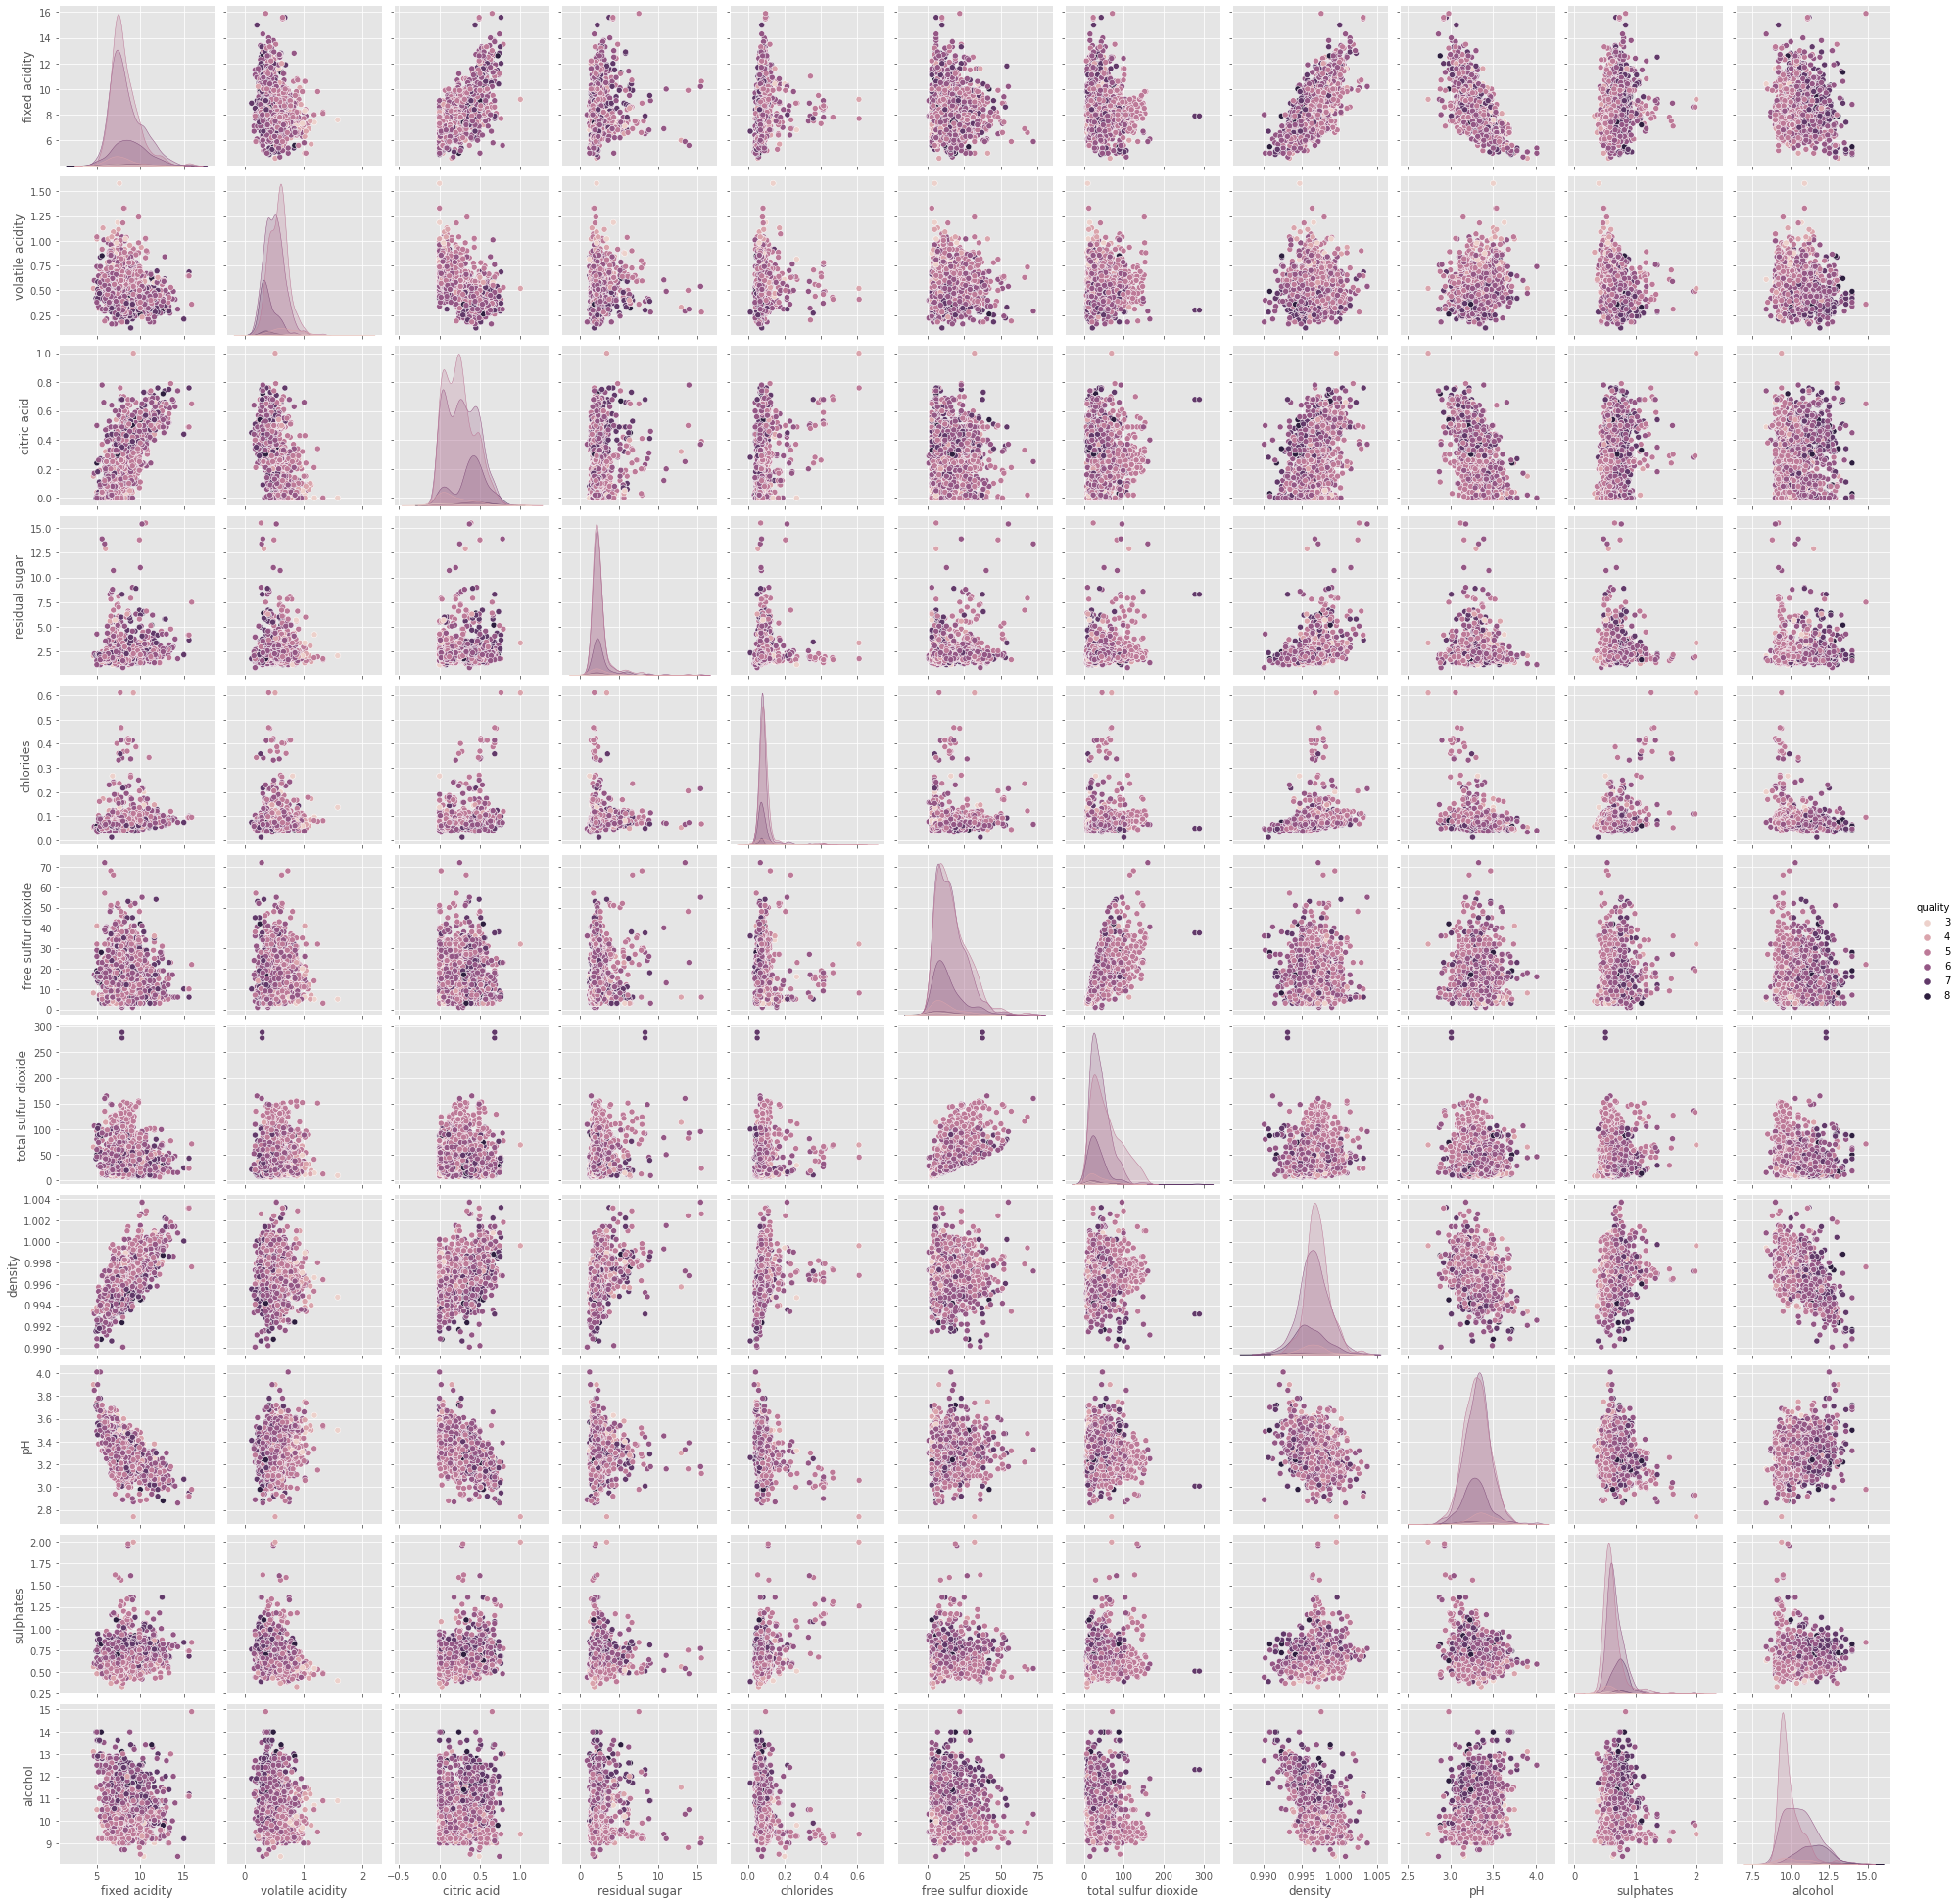

In [6]:
# Scatter plots and kdes.
sns.pairplot(df, hue='quality');

## Two Dimensions

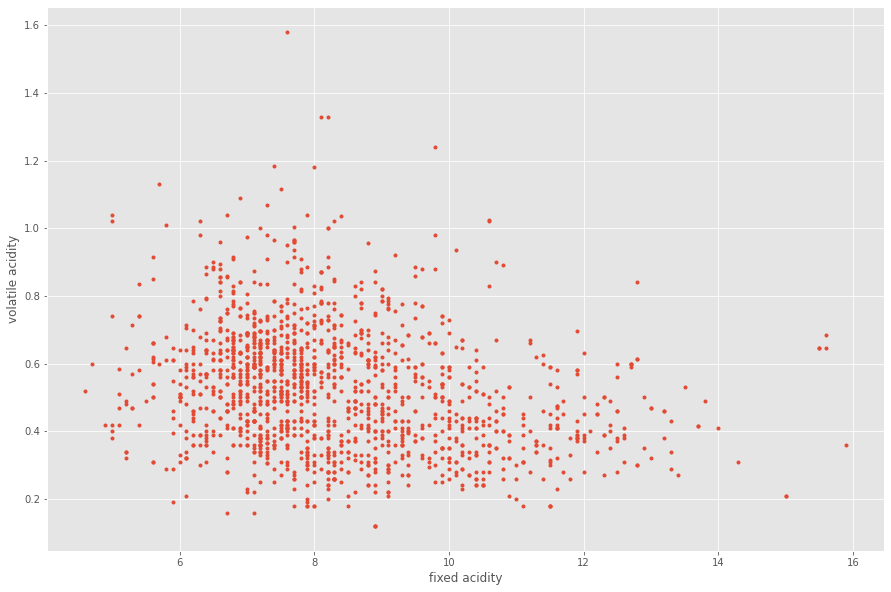

In [7]:
# New figure.
fig, ax = plt.subplots()

# Scatter plot.
ax.plot(df['fixed acidity'], df['volatile acidity'], '.')

# Set axis labels.
ax.set_xlabel('fixed acidity');
ax.set_ylabel('volatile acidity');

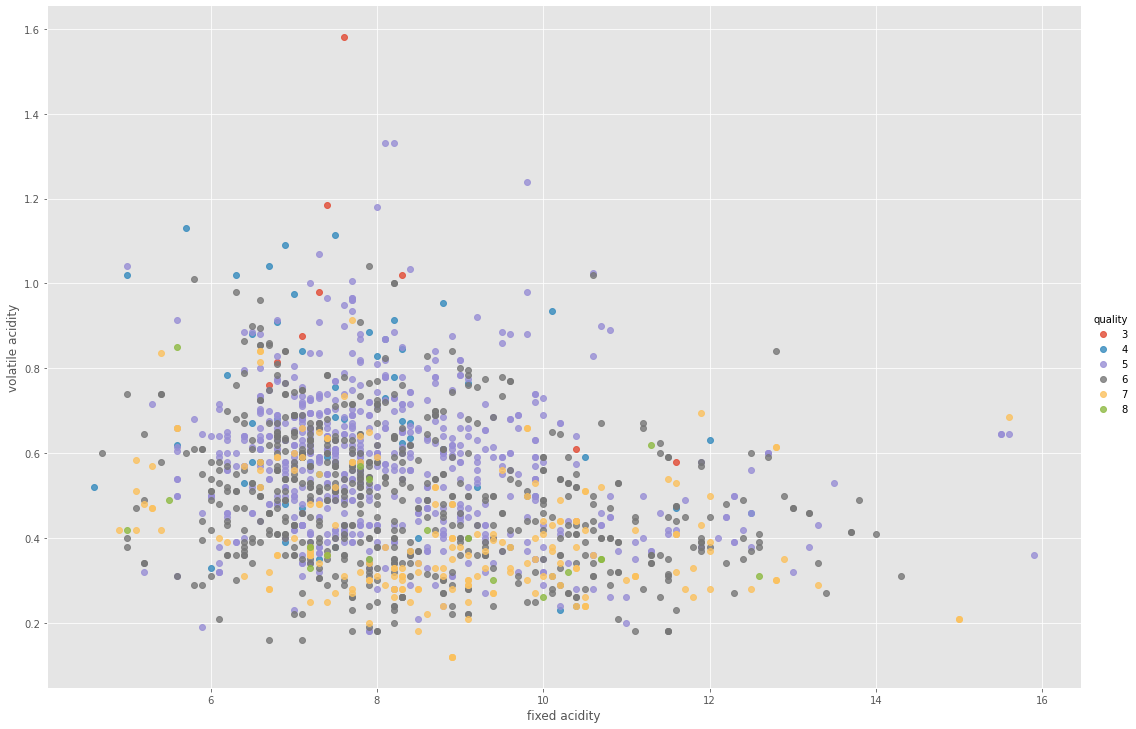

In [8]:
# Seaborn is great for creating complex plots with one command.
sns.lmplot(x="fixed acidity", y="volatile acidity", hue='quality', data=df, fit_reg=False, height=10, aspect=1.5);

## Using pyplot

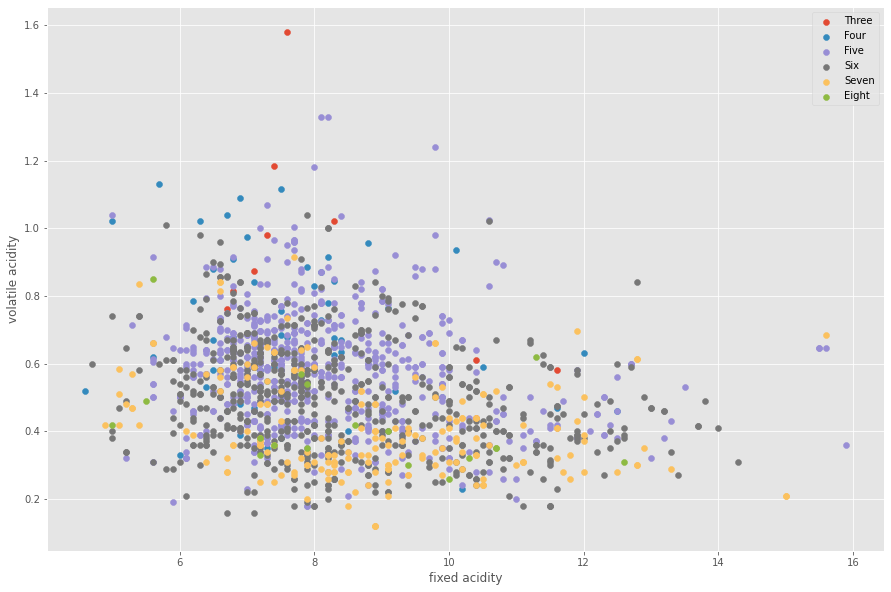

In [9]:
# Segregate the data.
three = df[df['quality'] == 3]
four = df[df['quality'] == 4]
five = df[df['quality'] == 5]
six = df[df['quality'] == 6]
seven = df[df['quality'] == 7]
eight = df[df['quality'] == 8]

# New plot.
fig, ax = plt.subplots()

# Scatter plots.
ax.scatter(three['fixed acidity'], three['volatile acidity'], label='Three')
ax.scatter(four['fixed acidity'], four['volatile acidity'], label='Four')
ax.scatter(five['fixed acidity'], five['volatile acidity'], label='Five')
ax.scatter(six['fixed acidity'], six['volatile acidity'], label='Six')
ax.scatter(seven['fixed acidity'], seven['volatile acidity'], label='Seven')
ax.scatter(eight['fixed acidity'], eight['volatile acidity'], label='Eight')

# Show the legend.
ax.set_xlabel('fixed acidity')
ax.set_ylabel('volatile acidity')
ax.legend();

In [10]:
# How the segregation works.
df['quality'] == 3

0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Name: quality, Length: 1599, dtype: bool

In [11]:
df[df['quality'] == 3].head()


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
459           11.6             0.580         0.66            2.20      0.074   
517           10.4             0.610         0.49            2.10      0.200   
690            7.4             1.185         0.00            4.25      0.097   
832           10.4             0.440         0.42            1.50      0.145   
899            8.3             1.020         0.02            3.40      0.084   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
459                 10.0                  47.0  1.00080  3.25       0.57   
517                  5.0                  16.0  0.99940  3.16       0.63   
690                  5.0                  14.0  0.99660  3.63       0.54   
832                 34.0                  48.0  0.99832  3.38       0.86   
899                  6.0                  11.0  0.99892  3.48       0.49   

     alcohol  quality  
459      9.0        3  
517      8.4        3  
690     10.7        3  
832      9.9        3  
899     11.0        3

## Using groupby()

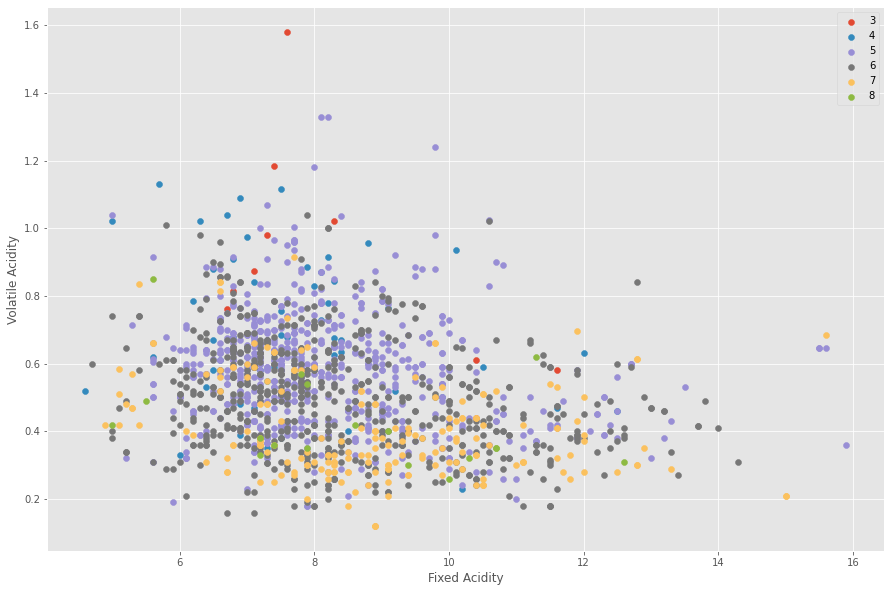

In [12]:
# New plot.
fig, ax = plt.subplots()

# Using pandas groupby().
for quality, data in df.groupby('quality'):
    ax.scatter(data['fixed acidity'], data['volatile acidity'], label=quality)

# Show the legend.
ax.set_xlabel('Fixed Acidity')
ax.set_ylabel('Volatile Acidity')
ax.legend();

In [13]:
# Group by typically takes a categorical variable.
x = df.groupby('quality')
x

In [14]:
# Pivot tables.
x.mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.360000          0.884500     0.171000        2.635000   
4             7.779245          0.693962     0.174151        2.694340   
5             8.167254          0.577041     0.243686        2.528855   
6             8.347179          0.497484     0.273824        2.477194   
7             8.872362          0.403920     0.375176        2.720603   
8             8.566667          0.423333     0.391111        2.577778   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.122500            11.000000             24.900000  0.997464   
4         0.090679            12.264151             36.245283  0.996542   
5         0.092736            16.983847             56.513950  0.997104   
6         0.084956            15.711599             40.869906  0.996615   
7         0.076588            14.045226             35.020101  0.996104   
8         0.068444            13.277778             33.444444  0.995212   

               pH  sulphates    alcohol  
quality                                  
3        3.398000   0.570000   9.955000  
4        3.381509   0.596415  10.265094  
5        3.304949   0.620969   9.899706  
6        3.318072   0.675329  10.629519  
7        3.290754   0.741256  11.465913  
8        3.267222   0.767778  12.094444

In [15]:
# Looping through groupby().
for i, j in x:
    print()
    print(f"i is: '{i}'")
    print(f"j looks like:\n{j[:3]}")
    print()


i is: '3'
j looks like:
     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
459           11.6             0.580         0.66            2.20      0.074   
517           10.4             0.610         0.49            2.10      0.200   
690            7.4             1.185         0.00            4.25      0.097   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
459                 10.0                  47.0   1.0008  3.25       0.57   
517                  5.0                  16.0   0.9994  3.16       0.63   
690                  5.0                  14.0   0.9966  3.63       0.54   

     alcohol  quality  
459      9.0        3  
517      8.4        3  
690     10.7        3  


i is: '4'
j looks like:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
18            7.4              0.59         0.08             4.4      0.086   
38            5.7              1.13         0.09             1.5     

## Test and Train Split

In [16]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [17]:
# Show some training data.
train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
736             7.7             0.965         0.10             2.1      0.112   
57              7.5             0.630         0.12             5.1      0.111   
1362           11.6             0.475         0.40             1.4      0.091   
1325            6.7             0.460         0.24             1.7      0.077   
626             8.8             0.600         0.29             2.2      0.098   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
736                  11.0                  22.0  0.99630  3.26       0.50   
57                   50.0                 110.0  0.99830  3.26       0.77   
1362                  6.0                  28.0  0.99704  3.07       0.65   
1325                 18.0                  34.0  0.99480  3.39       0.60   
626                   5.0                  15.0  0.99880  3.36       0.49   

        alcohol  quality  
736    9.500000        5  
57     9.400000        5  
1362  10.033333        6  
1325  10.600000        6  
626    9.100000        5

In [18]:
# The indices of the train array.
train.index

Int64Index([ 736,   57, 1362, 1325,  626, 1181,    3,  244, 1152,  152,
            ...
             180,  911,  946, 1570,  928,  740,  234, 1055, 1088, 1082],
           dtype='int64', length=1199)

In [19]:
# Show some testing data.
test.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1008            8.9              0.35         0.40             3.6      0.110   
1136           10.4              0.52         0.45             2.0      0.080   
272            10.9              0.37         0.58             4.0      0.071   
398            11.5              0.59         0.59             2.6      0.087   
959             8.0              0.59         0.05             2.0      0.089   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1008                 12.0                  24.0  0.99549  3.23       0.70   
1136                  6.0                  13.0  0.99774  3.22       0.76   
272                  17.0                  65.0  0.99935  3.22       0.78   
398                  13.0                  49.0  0.99880  3.18       0.65   
959                  12.0                  32.0  0.99735  3.36       0.61   

      alcohol  quality  
1008     12.0        7  
1136     11.4        6  
272      10.1        5  
398      11.0        6  
959      10.0        5

In [20]:
test.index.size


400

## Two Dimensions: Test Train Split

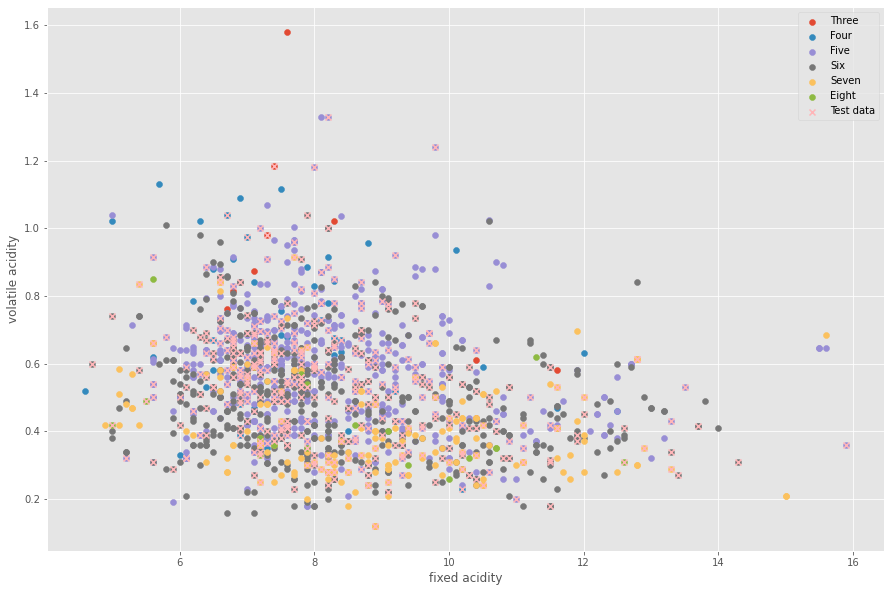

In [21]:
# Segregate the data.
three = df[df['quality'] == 3]
four = df[df['quality'] == 4]
five = df[df['quality'] == 5]
six = df[df['quality'] == 6]
seven = df[df['quality'] == 7]
eight = df[df['quality'] == 8]

# New plot.
fig, ax = plt.subplots()

# Scatter plots.
ax.scatter(three['fixed acidity'], three['volatile acidity'], marker='o', label='Three')
ax.scatter(four['fixed acidity'], four['volatile acidity'], marker='o', label='Four')
ax.scatter(five['fixed acidity'], five['volatile acidity'], marker='o', label='Five')
ax.scatter(six['fixed acidity'], six['volatile acidity'], marker='o', label='Six')
ax.scatter(seven['fixed acidity'], seven['volatile acidity'], marker='o', label='Seven')
ax.scatter(eight['fixed acidity'], eight['volatile acidity'], marker='o', label='Eight')

# Scatter plot for testing data.
ax.scatter(test['fixed acidity'], test['volatile acidity'], marker='x', label='Test data')

# Show the legend.
ax.set_xlabel('fixed acidity')
ax.set_ylabel('volatile acidity')
ax.legend();

## Two Dimensions: Inputs and outputs

In [22]:
# Give the inputs and outputs convenient names.
inputs, outputs = train[['volatile acidity', 'fixed acidity']], train['quality']

In [23]:
# Peek at the inputs.
inputs.head()

volatile acidity  fixed acidity
736              0.965            7.7
57               0.630            7.5
1362             0.475           11.6
1325             0.460            6.7
626              0.600            8.8

In [24]:
# Peek at the outputs.
outputs.head()

736     5
57      5
1362    6
1325    6
626     5
Name: quality, dtype: int64

## Two Dimensions: Logistic regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [25]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

C:\Users\oskar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [26]:
# Ask the classifier to classify the test data.
predictions = lre.predict(test[['volatile acidity', 'fixed acidity']])
predictions

array([6, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6,
       5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6,
       6, 5, 6, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 6, 6, 5, 6,
       6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 6,
       6, 6, 6, 5, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6,
       5, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6,
       5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5,
       6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5,
       6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 6, 5,
       6, 6, 6, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5,
       6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 6,
       5, 5, 6, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6,
       5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 5,
       5, 6, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 6,

In [27]:
# Eyeball the misclassifications.
predictions == test['quality']

1008    False
1136    False
272     False
398     False
959      True
        ...  
1572     True
5        True
1442     True
192      True
635      True
Name: quality, Length: 400, dtype: bool

In [28]:
# What proportion were correct?
lre.score(test[['volatile acidity', 'fixed acidity']], test['quality'])

0.505

## Two Dimensions: Misclassified

In [65]:
# Append a column to the test data frame with the predictions.
test['predicted'] = predictions
test.head()

<ipython-input-65-7f2fd5111565>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted'] = predictions


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1207            9.9              0.72         0.55             1.7      0.136   
317             9.6              0.77         0.12             2.9      0.082   
786             9.9              0.35         0.41             2.3      0.083   
948             8.9              0.12         0.45             1.8      0.075   
985             7.4              0.58         0.00             2.0      0.064   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1207                 24.0                  52.0  0.99752  3.35       0.94   
317                  30.0                  74.0  0.99865  3.30       0.64   
786                  11.0                  61.0  0.99820  3.21       0.50   
948                  10.0                  21.0  0.99552  3.41       0.76   
985                   7.0                  11.0  0.99562  3.45       0.58   

      alcohol  quality  predictions  predicted  
1207     10.0        5            5          5  
317      10.4        6            5          5  
786       9.5        5            5          5  
948      11.9        7            6          6  
985      11.3        6            6          6

In [30]:
# Show the misclassified data.
misclass = test[test['predicted'] != test['species']]
misclass

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1008            8.9              0.35         0.40             3.6      0.110   
1136           10.4              0.52         0.45             2.0      0.080   
272            10.9              0.37         0.58             4.0      0.071   
398            11.5              0.59         0.59             2.6      0.087   
1514            6.9              0.84         0.21             4.1      0.074   
...             ...               ...          ...             ...        ...   
779             7.1              0.52         0.03             2.6      0.076   
471             9.6              0.54         0.42             2.4      0.081   
1577            6.2              0.70         0.15             5.1      0.076   
788            10.0              0.56         0.24             2.2      0.079   
1537            5.4              0.58         0.08             1.9      0.059   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1008                 12.0                  24.0  0.99549  3.23       0.70   
1136                  6.0                  13.0  0.99774  3.22       0.76   
272                  17.0                  65.0  0.99935  3.22       0.78   
398                  13.0                  49.0  0.99880  3.18       0.65   
1514                 16.0                  65.0  0.99842  3.53       0.72   
...                   ...                   ...      ...   ...        ...   
779                  21.0                  92.0  0.99745  3.50       0.60   
471                  25.0                  52.0  0.99700  3.20       0.71   
1577                 13.0                  27.0  0.99622  3.54       0.60   
788                  19.0                  58.0  0.99910  3.18       0.56   
1537                 20.0                  31.0  0.99484  3.50       0.64   

        alcohol  quality  predicted  
1008  12.000000        7          6  
1136  11.400000        6          5  
272   10.100000        5          6  
398   11.000000        6          5  
1514   9.233333        6          5  
...         ...      ...        ...  
779    9.800000        5          6  
471   11.400000        6          5  
1577  11.900000        6          5  
788   10.100000        6          5  
1537  10.200000        6          5  

[198 rows x 13 columns]

In [31]:
# Eyeball the descriptive statistics for the quality.
train.groupby('quality').mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.612500          0.835000     0.207500        2.500000   
4             7.751220          0.708659     0.152927        2.782927   
5             8.207071          0.575677     0.246141        2.526364   
6             8.324089          0.497004     0.269798        2.470445   
7             8.814286          0.398503     0.365850        2.677211   
8             8.850000          0.433571     0.408571        2.764286   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.133375            10.625000             23.250000  0.997624   
4         0.080341            12.390244             36.634146  0.996473   
5         0.093038            17.062626             56.503030  0.997159   
6         0.083848            15.696356             40.925101  0.996582   
7         0.076279            14.085034             34.687075  0.996075   
8         0.071071            13.071429             30.214286  0.995473   

               pH  sulphates    alcohol  
quality                                  
3        3.380000   0.576250   9.893750  
4        3.404634   0.577805  10.358537  
5        3.302768   0.629111   9.878081  
6        3.319190   0.678279  10.655263  
7        3.297143   0.745714  11.449773  
8        3.248571   0.738571  12.135714

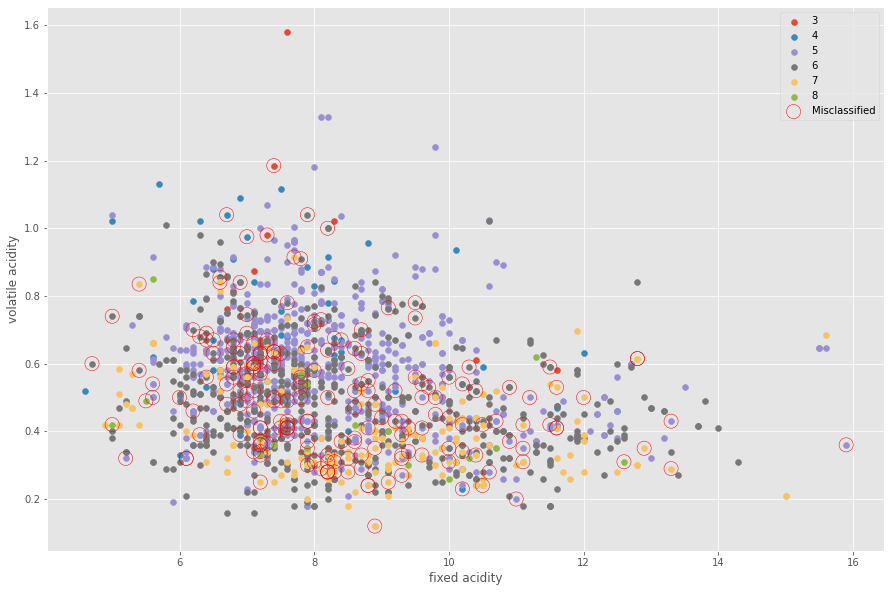

In [32]:
# New plot.
fig, ax = plt.subplots()

# Plot the training data
for species, data in df.groupby('quality'):
    ax.scatter(data['fixed acidity'], data['volatile acidity'], label=species)
    
# Plot misclassified.
ax.scatter(misclass['fixed acidity'], misclass['volatile acidity'], s=200, facecolor='none', edgecolor='r', label='Misclassified')

# Show the legend.
ax.set_xlabel('fixed acidity')
ax.set_ylabel('volatile acidity')
ax.legend();

## Separating Quality (3)
From Wikipedia:

ℓ=logbp1−p=β0+β1x1+β2x2

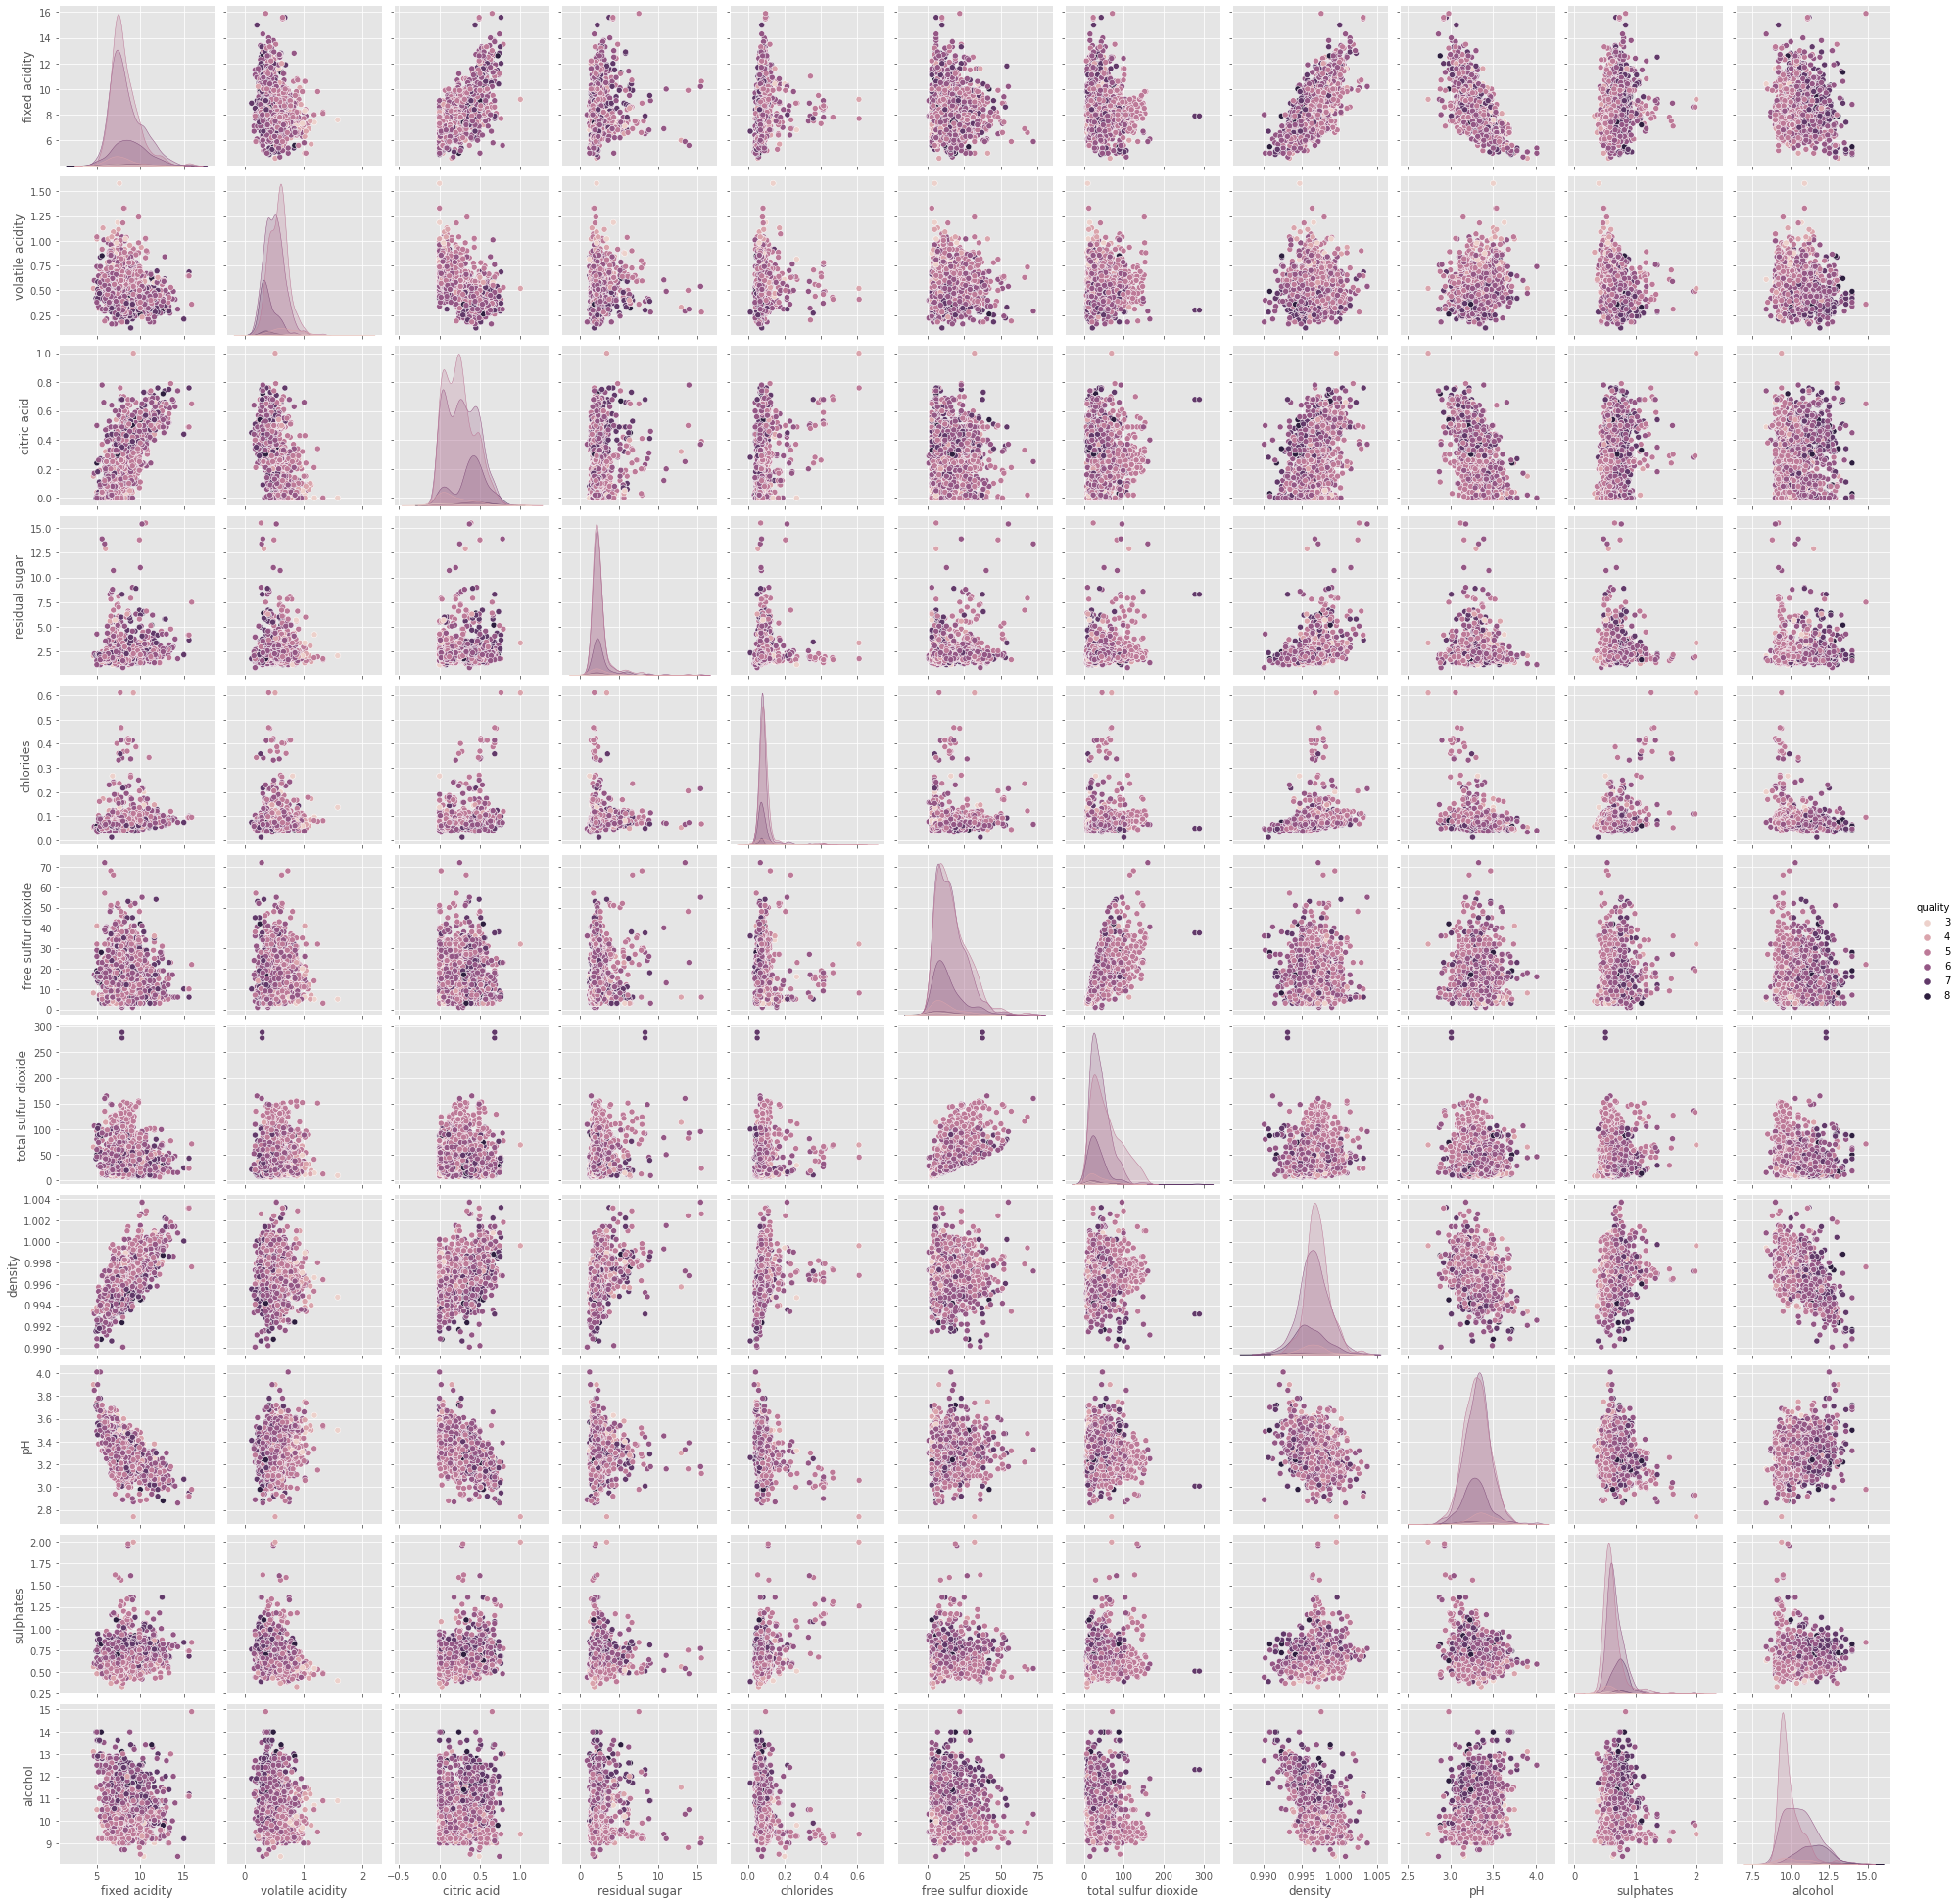

In [33]:
# Another look at this plot.
sns.pairplot(df, hue='quality');

In [41]:
# Give the inputs and outputs convenient names.
inputs = train[['volatile acidity', 'fixed acidity']]

# Set '4, 5, 6, 7, 8' to 'other' or 0.
outputs = train['quality'].apply(lambda x: x if x == 3 else 0)

# Eyeball outputs
outputs.unique()

array([0, 3], dtype=int64)

In [42]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

LogisticRegression(random_state=0)

In [45]:
actual = test['quality'].apply(lambda x: x if x == 3 else 0)

# What proportion were correct?
lre.score(test[['volatile acidity', 'fixed acidity']], actual)

0.995

## Using All Possible Inputs


In [46]:
# Load the wine data set from a file.
df = pd.read_csv('winequality-red.csv', sep = ";")

In [47]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [48]:
# Use all eleven possible inputs.
inputs, outputs = train[['volatile acidity', 'fixed acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']], train['quality']

In [49]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

C:\Users\oskar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [50]:
# Ask the classifier to classify the test data.
predictions = lre.predict(test[['volatile acidity', 'fixed acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])
predictions

array([6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 6,
       6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6,
       5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6,
       6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5,
       6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6,
       5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 7, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5,
       5, 7, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 6,
       5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5,
       6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 5,
       5, 6, 5, 5, 5, 6, 6, 6, 7, 5, 6, 5, 5, 5, 5, 6, 5, 6, 6, 5, 5, 6,
       5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 6,
       5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5,
       6, 6, 6, 6, 5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6,

In [51]:
# Eyeball the misclassifications.
(predictions == test['quality']).value_counts()

True     230
False    170
Name: quality, dtype: int64

In [52]:
# What proportion were correct?
lre.score(test[['volatile acidity', 'fixed acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']], test['quality'])

0.575

## k Nearest Neighbours Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [53]:
# Load the wine data set from a file.
df = pd.read_csv('winequality-red.csv', sep = ";")

In [54]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [55]:
# Use all eleven possible inputs.
inputs, outputs = train[['volatile acidity', 'fixed acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']], train['quality']

In [56]:
# Classifier.
knn = nei.KNeighborsClassifier()

In [57]:
# Fit.
knn.fit(inputs, outputs)

KNeighborsClassifier()

In [58]:
# Predict.
predictions = lre.predict(test[['volatile acidity', 'fixed acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])
(predictions == test['quality']).value_counts()

True     243
False    157
Name: quality, dtype: int64

In [59]:
# The score is just the accuracy in this case.
(predictions == test['quality']).value_counts(normalize=True)

True     0.6075
False    0.3925
Name: quality, dtype: float64

## Cross Validation
https://scikit-learn.org/stable/modules/cross_validation.html

In [60]:
knn = nei.KNeighborsClassifier()
scores = mod.cross_val_score(knn, df[['volatile acidity', 'fixed acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']], df['quality'])
scores

array([0.446875  , 0.475     , 0.4625    , 0.390625  , 0.43573668])

In [61]:
print(f"Mean: {scores.mean()} \t Standard Deviation: {scores.std()}")


Mean: 0.4421473354231975 	 Standard Deviation: 0.029022497910809644


In [62]:
lre = lm.LogisticRegression(random_state=0)
scores = mod.cross_val_score(lre, df[['volatile acidity', 'fixed acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']], df['quality'])
scores

C:\Users\oskar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\oskar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.525    , 0.559375 , 0.60625  , 0.584375 , 0.5862069])

In [63]:
print(f"Mean: {scores.mean()} \t Standard Deviation: {scores.std()}")


Mean: 0.5722413793103448 	 Standard Deviation: 0.027914649701452722


## End